##INTEGRANTES


LINDA REYES BUITRAGO




*   LISSETH MERCHAN NARANJO 
*   DANIEL RAMIREZ MONTENEGRO







In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as seaborn

In [11]:
df= pd.read_csv('archivo.csv')

In [12]:
df.head()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0


##Solucion taller

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [14]:
df=df[df['parentesco_jefe_hogar']=='jefe_hogar'].reset_index(drop=True)

In [15]:
gastos=['gastos_alojamiento_valor', 'gastos_transporte_valor', 'gastos_trans_publico_lugar_valor', 'gastos_bienes_personales_valor', 'gastos_regalos_valor', 'gastos_otros_valor', 'gastos_transporte_aereo_valor']

In [16]:
gastos

['gastos_alojamiento_valor',
 'gastos_transporte_valor',
 'gastos_trans_publico_lugar_valor',
 'gastos_bienes_personales_valor',
 'gastos_regalos_valor',
 'gastos_otros_valor',
 'gastos_transporte_aereo_valor']

In [17]:
df['gastos_totales'] = df.fillna(0)[gastos].sum(axis=1)

In [18]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0,0.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0,0.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,pension,NaN,1050000.0,0.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0,0.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0,0.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0,0.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,pension,NaN,5000000.0,0.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0,0.0


In [19]:
lista=['edad', 'estado_civil', 'motivo_viaje', 'compañía_viaje', 'num_viajes_12_meses', 'estrato', 'ingreso_mensual_aprox', 'viaje_noche_fuera', 'gastos_totales', 'num_noches']

In [20]:
lista

['edad',
 'estado_civil',
 'motivo_viaje',
 'compañía_viaje',
 'num_viajes_12_meses',
 'estrato',
 'ingreso_mensual_aprox',
 'viaje_noche_fuera',
 'gastos_totales',
 'num_noches']

In [21]:
df_filtrado=df[lista]

In [22]:
df_filtrado

,edad,estado_civil,motivo_viaje,compañía_viaje,num_viajes_12_meses,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales,num_noches
0,56,soltero,NaN,NaN,NaN,1.0,880000.0,no,0.0,NaN
1,39,separado_divorciado,NaN,NaN,NaN,1.0,860000.0,no,0.0,NaN
2,68,viudo,NaN,NaN,NaN,1.0,1050000.0,no,0.0,NaN
3,34,pareja_no_union_libre,NaN,NaN,NaN,1.0,820000.0,no,0.0,NaN
4,25,pareja_union_libre,NaN,NaN,NaN,1.0,850000.0,no,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
14024,63,casado,NaN,NaN,NaN,2.0,9000000.0,no,0.0,NaN
14025,66,separado_divorciado,NaN,NaN,NaN,1.0,828116.0,no,0.0,NaN
14026,71,casado,NaN,NaN,NaN,4.0,5000000.0,no,0.0,NaN
14027,50,casado,NaN,NaN,NaN,3.0,3800000.0,no,0.0,NaN


In [23]:
df_filtrado.isna().sum()

edad                         0
estado_civil                 0
motivo_viaje             12411
compañía_viaje           12411
num_viajes_12_meses      12428
estrato                     12
ingreso_mensual_aprox      236
viaje_noche_fuera            0
gastos_totales               0
num_noches               12411
dtype: int64

In [24]:
df_filtrado.drop(columns=['motivo_viaje', 'compañía_viaje', 'num_viajes_12_meses', 'num_noches'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df_filtrado

,edad,estado_civil,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales
0,56,soltero,1.0,880000.0,no,0.0
1,39,separado_divorciado,1.0,860000.0,no,0.0
2,68,viudo,1.0,1050000.0,no,0.0
3,34,pareja_no_union_libre,1.0,820000.0,no,0.0
4,25,pareja_union_libre,1.0,850000.0,no,0.0
...,...,...,...,...,...,...
14024,63,casado,2.0,9000000.0,no,0.0
14025,66,separado_divorciado,1.0,828116.0,no,0.0
14026,71,casado,4.0,5000000.0,no,0.0
14027,50,casado,3.0,3800000.0,no,0.0


In [26]:
df_filtrado['estrato'].median()

2.0

In [27]:
df_filtrado['estrato'].fillna(2.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
df_filtrado['ingreso_mensual_aprox'].median()

1128000.0

In [29]:
df_filtrado['ingreso_mensual_aprox'].fillna(1128000.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
df_filtrado.isna().sum()

edad                     0
estado_civil             0
estrato                  0
ingreso_mensual_aprox    0
viaje_noche_fuera        0
gastos_totales           0
dtype: int64

In [31]:
df_filtrado.duplicated().sum()

2697

In [32]:
df_filtrado= df_filtrado.drop_duplicates().reset_index(drop= True)


In [33]:
df_filtrado.describe()

,edad,estrato,ingreso_mensual_aprox,gastos_totales
count,11332.000000,11332.000000,1.133200e+04,1.133200e+04
mean,50.746911,2.332951,1.668917e+06,4.338945e+04
std,16.815639,1.154654,1.770557e+06,2.450463e+05
min,15.000000,0.000000,9.800000e+01,0.000000e+00
25%,37.000000,1.000000,8.000000e+05,0.000000e+00
50%,51.000000,2.000000,1.150000e+06,0.000000e+00
75%,63.000000,3.000000,2.000000e+06,0.000000e+00
max,102.000000,9.000000,3.000000e+07,8.000000e+06


In [34]:
df_filtrado.head()

,edad,estado_civil,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales
0,56,soltero,1.0,880000.0,no,0.0
1,39,separado_divorciado,1.0,860000.0,no,0.0
2,68,viudo,1.0,1050000.0,no,0.0
3,34,pareja_no_union_libre,1.0,820000.0,no,0.0
4,25,pareja_union_libre,1.0,850000.0,no,0.0


In [35]:
df_filtrado.tail()

,edad,estado_civil,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales
11327,63,casado,2.0,9000000.0,no,0.0
11328,66,separado_divorciado,1.0,828116.0,no,0.0
11329,71,casado,4.0,5000000.0,no,0.0
11330,50,casado,3.0,3800000.0,no,0.0
11331,61,casado,2.0,4000000.0,si,150000.0


In [36]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   11332 non-null  int64  
 1   estado_civil           11332 non-null  object 
 2   estrato                11332 non-null  float64
 3   ingreso_mensual_aprox  11332 non-null  float64
 4   viaje_noche_fuera      11332 non-null  object 
 5   gastos_totales         11332 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 531.3+ KB


In [71]:
df_filtrado.replace({'viaje_noche_fuera':{'si':1, 'no':0}}, inplace = True)

In [72]:
df_filtrado

,edad,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales,estado_civil_pareja_no_union_libre,estado_civil_pareja_union_libre,estado_civil_separado_divorciado,estado_civil_soltero,estado_civil_viudo,edad_soltero
0,56,1.0,880000.0,0,0.0,0,0,0,1,0,56
1,39,1.0,860000.0,0,0.0,0,0,1,0,0,0
2,68,1.0,1050000.0,0,0.0,0,0,0,0,1,0
3,34,1.0,820000.0,0,0.0,1,0,0,0,0,0
4,25,1.0,850000.0,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11327,63,2.0,9000000.0,0,0.0,0,0,0,0,0,0
11328,66,1.0,828116.0,0,0.0,0,0,1,0,0,0
11329,71,4.0,5000000.0,0,0.0,0,0,0,0,0,0
11330,50,3.0,3800000.0,0,0.0,0,0,0,0,0,0


In [73]:
df_filtrado = pd.get_dummies(df_filtrado,drop_first = True)

In [74]:
df_filtrado

,edad,estrato,ingreso_mensual_aprox,viaje_noche_fuera,gastos_totales,estado_civil_pareja_no_union_libre,estado_civil_pareja_union_libre,estado_civil_separado_divorciado,estado_civil_soltero,estado_civil_viudo,edad_soltero
0,56,1.0,880000.0,0,0.0,0,0,0,1,0,56
1,39,1.0,860000.0,0,0.0,0,0,1,0,0,0
2,68,1.0,1050000.0,0,0.0,0,0,0,0,1,0
3,34,1.0,820000.0,0,0.0,1,0,0,0,0,0
4,25,1.0,850000.0,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11327,63,2.0,9000000.0,0,0.0,0,0,0,0,0,0
11328,66,1.0,828116.0,0,0.0,0,0,1,0,0,0
11329,71,4.0,5000000.0,0,0.0,0,0,0,0,0,0
11330,50,3.0,3800000.0,0,0.0,0,0,0,0,0,0


In [75]:
df_filtrado.info

<bound method DataFrame.info of        edad  estrato  ingreso_mensual_aprox  viaje_noche_fuera  \
0        56      1.0               880000.0                  0   
1        39      1.0               860000.0                  0   
2        68      1.0              1050000.0                  0   
3        34      1.0               820000.0                  0   
4        25      1.0               850000.0                  0   
...     ...      ...                    ...                ...   
11327    63      2.0              9000000.0                  0   
11328    66      1.0               828116.0                  0   
11329    71      4.0              5000000.0                  0   
11330    50      3.0              3800000.0                  0   
11331    61      2.0              4000000.0                  1   

       gastos_totales  estado_civil_pareja_no_union_libre  \
0                 0.0                                   0   
1                 0.0                                

In [94]:
y=df_filtrado["viaje_noche_fuera"]
X=df_filtrado.copy()
X = sm.add_constant(X)

model = sm.OLS(y,X)
reg = model.fit()
reg.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.932e+25
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:30:53   Log-Likelihood:             2.9159e+05
No. Observations:               11332   AIC:                        -5.832e+05
Df Residuals:                   11320   BIC:                        -5.831e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -3.235e-16   7.53e-14     -0.004      0.997   -1.48e-13    1.47e-13
edad                                3.513e-17   1.17e-15      0.030      0.976   -2.26e-15    2.33e-15
estrato                            -4.454e-16   1.51e-14     -0.030      0.976      -3e-14    2.91e-14
ingreso_mensual_aprox               2.755e-19   9.95e-21     27.680      0.000    2.56e-19    2.95e-19
viaje_noche_fuera                      1.0000   4.82e-14   2.08e+13      0.000       1.000       1.000
gastos_totales                     -6.686e-18   6.94e-20    -96.277      0.000   -6.82e-18   -6.55e-18
estado_civil_pareja_no_union_libre  4.441e-16   1.12e-13      0.004      0.997    -2.2e-13    2.21e-13
estado_civil_pareja_union_libre    -6.271e-16   4.43e-14     -0.014      0.989   -8.75e-14    8.63e-14
estado_civil_separado_divorciado    5.868e-16    4.6e-14      0.013      0.990   -8.95e-14    9.07e-14
estado_civil_soltero                9.073e-16   1.25e-13      0.007      0.994   -2.45e-13    2.47e-13
estado_civil_viudo                 -6.124e-16   5.82e-14     -0.011      0.992   -1.15e-13    1.13e-13
edad_soltero                        -8.18e-17   2.58e-15     -0.032      0.975   -5.13e-15    4.97e-15
==============================================================================
Omnibus:                    20501.332   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36549841.617
Skew:                          13.168   Prob(JB):                         0.00
Kurtosis:                     279.975   Cond. No.                     2.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11327    0
11328    0
11329    0
11330    0
11331    1
Name: viaje_noche_fuera, Length: 11332, dtype: int64

In [96]:
df_filtrado['edad_soltero']= df_filtrado['edad']*df_filtrado['estado_civil_soltero']

##GRAFICAS

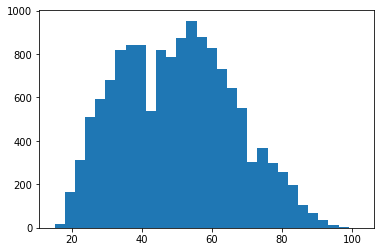

In [97]:
plt.hist(df['edad'], bins=30)
plt.show()

In [98]:
vjnf = df_filtrado ["edad_soltero"].value_counts()

In [80]:
vjnf.index

Int64Index([ 0, 23, 24, 22, 28, 34, 20, 21, 32, 26, 30, 36, 38, 25, 27, 56, 33,
            29, 37, 31, 19, 57, 49, 43, 52, 44, 59, 46, 50, 35, 40, 42, 48, 18,
            51, 58, 63, 45, 41, 39, 55, 53, 60, 47, 61, 54, 62, 65, 64, 70, 68,
            67, 71, 78, 72, 73, 17, 74, 66, 69, 75, 85, 77, 80, 81, 79, 76, 16,
            84, 89, 82, 95, 91, 87, 83],
           dtype='int64')

In [99]:
vjnf.values

array([9535,   52,   52,   48,   45,   45,   44,   44,   42,   41,   41,
         41,   40,   40,   39,   39,   38,   38,   37,   36,   36,   36,
         35,   34,   34,   33,   32,   30,   30,   30,   29,   29,   29,
         28,   28,   27,   27,   27,   26,   26,   25,   24,   23,   23,
         22,   21,   20,   20,   19,   18,   18,   18,   15,   12,   12,
         12,   12,   11,   10,    9,    7,    6,    6,    4,    3,    3,
          3,    3,    2,    2,    2,    1,    1,    1,    1])

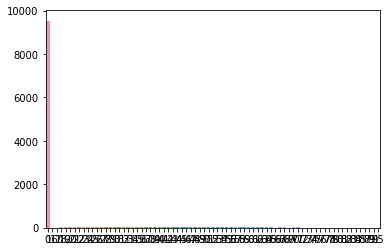

In [100]:
import seaborn as sns
sns.barplot(x=vjnf.index, y=vjnf.values)

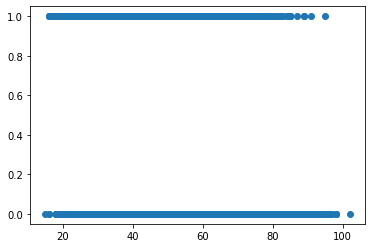

In [101]:
plt.scatter(df_filtrado["edad"],df_filtrado["estado_civil_soltero"])

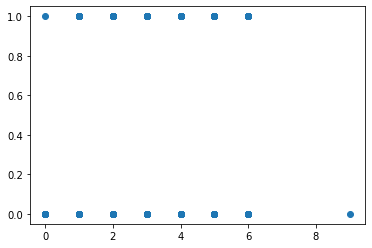

In [102]:
plt.scatter(df_filtrado["estrato"],df_filtrado["viaje_noche_fuera"])

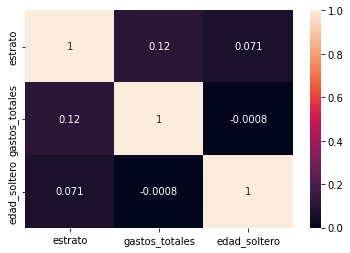

In [104]:
sns.heatmap(df_filtrado[["estrato","gastos_totales","edad_soltero"]].corr(),annot=True)

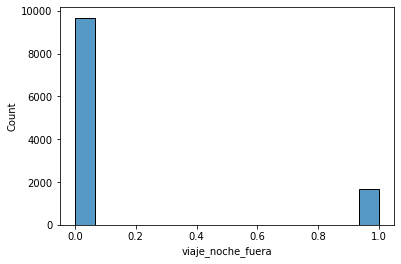

In [106]:
sns.histplot(x=df_filtrado["viaje_noche_fuera"])

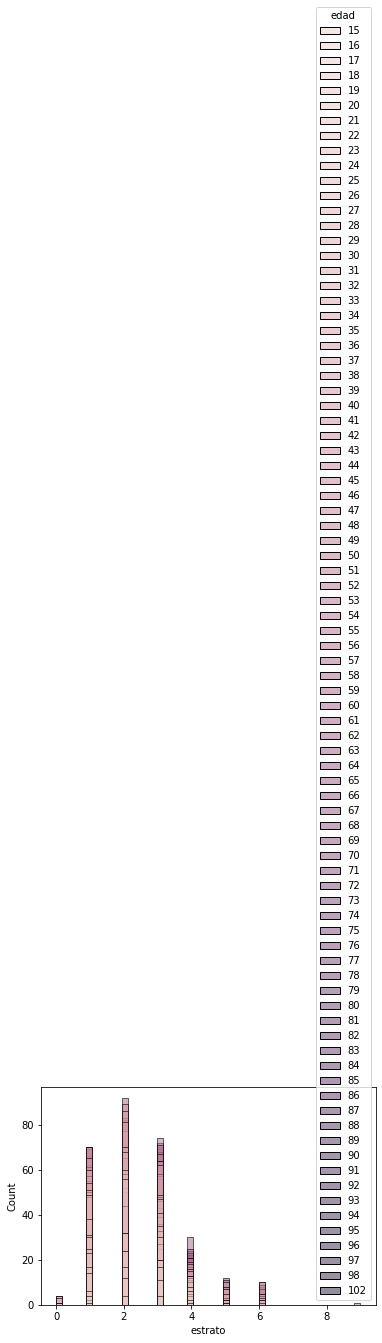

In [107]:
sns.histplot(data=df_filtrado, x="estrato",hue="edad_soltero")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


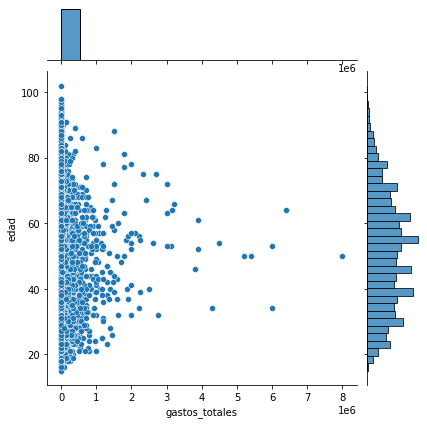

In [108]:
sns.jointplot(df_filtrado["gastos_totales"],df_filtrado["edad"])

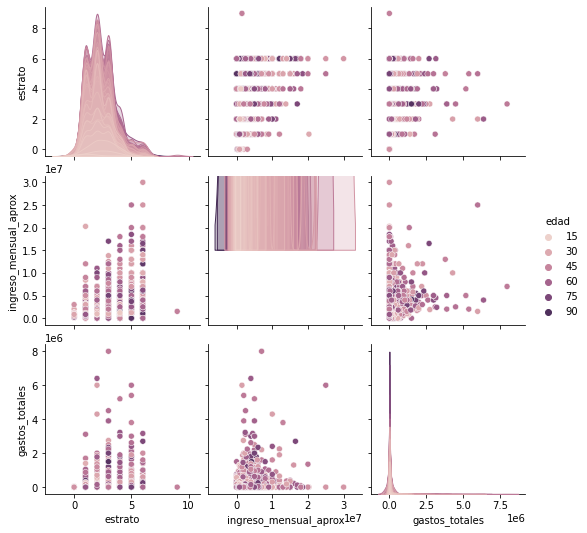

In [112]:
sns.pairplot(df_filtrado[["estrato","edad","ingreso_mensual_aprox","gastos_totales"]],hue="edad")

##ANALISIS

Las variables que no son representativas para modelo son el estado civil, exceptuando si es soltero, ya que analizándolo con otra variable, en este caso analizada con la variable edad muestra una relación negativa, en cuanto el individuo tenga más edad y esté soltero es menos probable que viaje, por otro lado si tiene menos edad y es soltero va a tener más posibilidades de que viaje

por otro lado la variable edad se ve tambien como representativa en el momento de decidir si viajar o no, de una forma negativa, es decir, a medida de que un individuo tiene mas edad la probabilidad de viaje es menor a que si el individuo tuviera menos edad.
la variable estrato se comporta inversa, es decir, a medida de que un individuo pertenece a un estrato mas alto la probabilidad de viajar sera mayor, un poco igual se comporta el ingreso mensual aproximado ya que segun los datos un individuo es impulsado a que viaje si el ingreso es alto, por otro lado segun los datos los gastos en cuanto sean mayores se traducen en mayor probabilidad de viajar, sin embargo, es una variable de interes al analizar en la practica ya que el razonamiento de los individuos puede ser cuestionada por el comportamiento hacia esa variable.
Por otro lado el estado civil de los individuos afectan a la decision de viaje como antes se habia planteado en la relacion con la edad sin embargo, analizando el estado civil soltero respecto al viudo es inversa, se podria llegar a la conclusion y planteando una hipotesis cualitativa apartir del analisis cuantitativo ya realizado que la compañia podria ser un factor en comun en cuanto los individuos viajan y afecta de manera significativa su decision.